In [462]:
#Library Imports
import pickle
import numpy as np

In [463]:
#retrieve training data
with open('/content/train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [464]:
#retrieve test data
with open('/content/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [465]:
#Number of training instances
len(train_data)
#Number of test instances
len(test_data)

1000

In [466]:
#Example of one of the instances
train_data[10]

(['Sandra',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'moved',
  'to',
  'the',
  'office',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 'yes')

In [467]:
' '.join(train_data[10][0]) #story

'Sandra went back to the hallway . Sandra moved to the office .'

In [468]:
' '.join(train_data[10][1]) #question

'Is Sandra in the office ?'

In [469]:
train_data[10][2] #answer

'yes'

In [470]:
#First we need to create a vocabulary with our data
#For this we will use the training data only to 
vocab = set()
for story, question, answer in train_data:
    vocab = vocab.union(set(story)) #Set returns unique words in the sentence
                                    #Union returns the unique common elements from a two sets
    vocab = vocab.union(set(question))

In [471]:
vocab.add('no')
vocab.add('yes')

In [472]:
print(vocab)

{'moved', 'bathroom', 'in', 'Is', 'hallway', 'dropped', 'down', 'yes', 'kitchen', 'travelled', 'milk', 'bedroom', 'got', 'up', 'went', 'put', '?', 'office', 'Sandra', 'garden', 'discarded', 'to', 'Mary', 'took', 'football', 'no', 'journeyed', 'John', '.', 'left', 'the', 'Daniel', 'there', 'back', 'apple', 'grabbed', 'picked'}


In [473]:
#Calculate len and add 1 for Keras placeholder - Placeholders are used to feed in the data to the network. 
#They need a data type, and have optional shape arguements.
#They will be empty at first, and then the data will get fed into the placeholder
vocab_len = len(vocab) + 1

In [474]:
print(vocab_len)

38


In [475]:
print(vocab)

{'moved', 'bathroom', 'in', 'Is', 'hallway', 'dropped', 'down', 'yes', 'kitchen', 'travelled', 'milk', 'bedroom', 'got', 'up', 'went', 'put', '?', 'office', 'Sandra', 'garden', 'discarded', 'to', 'Mary', 'took', 'football', 'no', 'journeyed', 'John', '.', 'left', 'the', 'Daniel', 'there', 'back', 'apple', 'grabbed', 'picked'}


In [476]:
#Now we are going to calculate the longest story and the longest question
#We need this for the Keras pad sequences. 
#Keras training layers expect all of the input to have the same length, so 
#we need to pad 
all_data = test_data + train_data

In [477]:
all_story_lens = [len(data[0]) for data in all_data]

In [478]:
max_story_len = (max(all_story_lens))

In [479]:
max_question_len = max([len(data[1]) for data in all_data])

### Vectorising the data

In [480]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


In [481]:
#Create an instance of the tokenizer object:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [482]:
#Dictionary that maps every word in our vocab to an index
# It has been automatically lowercased
#This tokenizer can give different indexes for different words depending on when we run it
print(tokenizer.word_index)

{'moved': 1, 'bathroom': 2, 'in': 3, 'is': 4, 'hallway': 5, 'dropped': 6, 'down': 7, 'yes': 8, 'kitchen': 9, 'travelled': 10, 'milk': 11, 'bedroom': 12, 'got': 13, 'up': 14, 'went': 15, 'put': 16, '?': 17, 'office': 18, 'sandra': 19, 'garden': 20, 'discarded': 21, 'to': 22, 'mary': 23, 'took': 24, 'football': 25, 'no': 26, 'journeyed': 27, 'john': 28, '.': 29, 'left': 30, 'the': 31, 'daniel': 32, 'there': 33, 'back': 34, 'apple': 35, 'grabbed': 36, 'picked': 37}


In [483]:
#Tokenize the stories, questions and answers:
train_story_text = []
train_question_text = []
train_answers = []
#Separating each of the elements
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question) 
    train_answers.append(answer)
#Coverting the text into the indexes 
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [484]:
def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    #vectorized stories:
    X = []
    #vectorized questions:
    Xq = []
    #vectorized answers:
    Y = []
    
    for story, question, answer in data:
        #Getting indexes for each word in the story
        x = [word_index[word.lower()] for word in story]
        #Getting indexes for each word in the story
        xq = [word_index[word.lower()] for word in question]
        #For the answers
        y = np.zeros(len(word_index) + 1) #Index 0 Reserved when padding the sequences
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Now we have to pad these sequences:
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [485]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [486]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [487]:
inputs_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 23,  1, 22, 31,  2, 29, 19, 27, 22,
       31, 12, 29], dtype=int32)

In [488]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [489]:
train_story_seq[0]

[23, 1, 22, 31, 2, 29, 19, 27, 22, 31, 12, 29]

## Building the Model

In [490]:
#Imports
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [491]:
# We need to create the placeholders 
#The Input function is used to create a keras tensor
#PLACEHOLDER shape = (max_story_len,batch_size)
#These are our placeholder for the inputs, ready to recieve batches of the stories and the questions
input_sequence = Input((max_story_len,)) #As we dont know batch size yet
question = Input((max_question_len,))

In [492]:
#Create input encoder M:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim) -- Gives a list of the lenght of the samples where each item has the
#lenght of the max story lenght and every word is embedded in the embbeding dimension

In [493]:
#Create input encoder C:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [494]:
#Create question encoder:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [495]:
#Now lets encode the sequences, passing the placeholders into our encoders:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [496]:
#Use dot product to compute similarity between input encoded m and question 
#Like in the paper:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [497]:
#For the response we want to add this match with the ouput of input_encoded_c
response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensions of input

In [498]:
#Once we have the response we can concatenate it with the question encoded:
answer = concatenate([response, question_encoded])

In [499]:

answer

<tf.Tensor 'concatenate_7/concat:0' shape=(None, 6, 220) dtype=float32>

In [500]:
# Reduce the answer tensor with a RNN (LSTM)
answer = LSTM(32)(answer)

In [501]:
#Regularization with dropout:
answer = Dropout(0.5)(answer)
#Output layer:
answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes or no and all 0s

In [502]:
#Now we need to output a probability distribution for the vocab, using softmax:
answer = Activation('softmax')(answer)

In [503]:
#Now we build the final model:
model = Model([input_sequence,question], answer)

In [504]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Categorical instead of binary cross entropy as because of the way we are training
#we could actually see any of the words from the vocab as output
#however, we should only see yes or no

In [505]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 156)          0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_19 (Sequential)      multiple             2432        input_13[0][0]                   
__________________________________________________________________________________________________
sequential_21 (Sequential)      (None, 6, 64)        2432        input_14[0][0]                   
____________________________________________________________________________________________

In [ ]:

history = model.fit([inputs_train,questions_train],answers_train, batch_size = 32, epochs = 100, validation_data = ([inputs_test,questions_test],answers_test))

In [507]:
filename = 'chatbot_model.h10'
model.save(filename)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


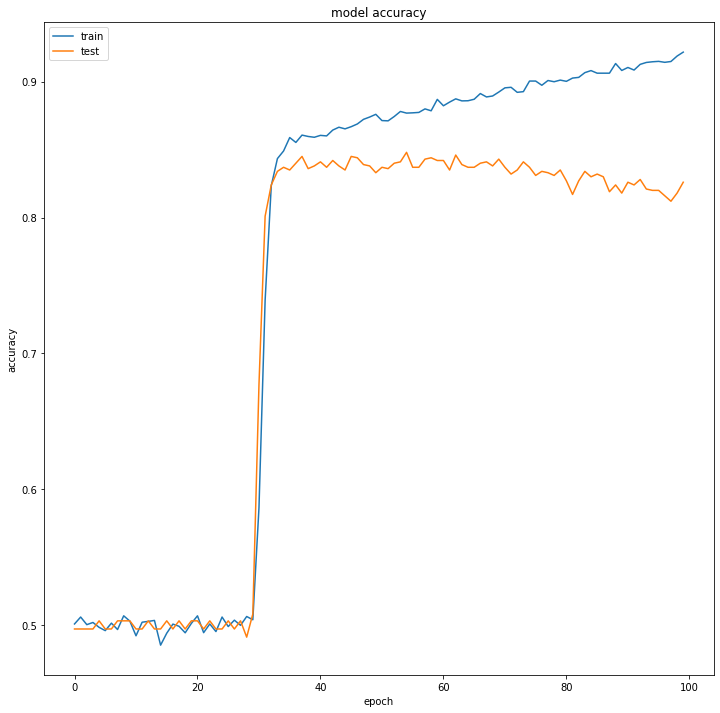

In [508]:
#Lets plot the increase of accuracy as we increase the number of training epochs
#We can see that without any training the acc is about 50%, random guessing
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Test the Model

In [544]:
#To load a model that we have already trained and saved:
from keras.models import load_model
model=load_model('/content/chatbot_model.h10')



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [545]:
#Lets check out the predictions on the test set:
#These are just probabilities for every single word on the vocab
pred_results = model.predict(([inputs_test,questions_test]))

In [546]:
#First test data point
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [547]:
#These are the probabilities for the vocab words using the 1st sentence
pred_results[0]

array([7.8486398e-14, 7.4002355e-14, 5.8381902e-14, 8.4658056e-14,
       6.0745449e-14, 6.4910581e-14, 5.6233847e-14, 6.4374863e-14,
       3.1387189e-04, 5.4258000e-14, 7.3613817e-14, 5.4822547e-14,
       5.5996244e-14, 4.9346811e-14, 9.7374318e-14, 5.3766385e-14,
       1.0897339e-13, 6.1730894e-14, 6.3984977e-14, 1.0048812e-13,
       9.2711822e-14, 1.1036671e-13, 9.8954543e-14, 5.6103790e-14,
       6.7933777e-14, 5.6448556e-14, 9.9968612e-01, 7.4600265e-14,
       7.1462001e-14, 6.4112147e-14, 5.9549283e-14, 5.2002256e-14,
       6.2774323e-14, 7.8156990e-14, 6.6290635e-14, 5.7822148e-14,
       9.0104295e-14, 7.1634220e-14], dtype=float32)

In [548]:
val_max = np.argmax(pred_results[0])

In [549]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [550]:
#See probability:
pred_results[0][val_max]

0.9996861

In [509]:
#To load a model that we have already trained and saved:
from keras.models import load_model
new_model=load_model('/content/chatbot_model.h10')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [510]:

#Now, we can make our own questions using the vocabulary we have
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [537]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_question = "Is John left the kitchen ?"

In [538]:
#Put the data in the same format as before
my_data = [(my_story.split(), my_question.split(),'yes')]

In [539]:

#Vectorize this data
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [540]:

#Make the prediction
pred_results = new_model.predict(([my_story,my_ques]))
print(pred_results)

[[3.5882118e-12 3.2988007e-12 2.6436980e-12 4.2214197e-12 2.5450397e-12
  3.3433373e-12 2.5426766e-12 2.6117769e-12 7.6728815e-01 2.5145446e-12
  3.2566022e-12 2.5355139e-12 2.6344311e-12 2.0178902e-12 5.0790839e-12
  2.1226146e-12 4.8332770e-12 2.6149920e-12 3.0280969e-12 4.6232180e-12
  4.3193274e-12 5.6177571e-12 4.4199024e-12 2.4795582e-12 3.0544727e-12
  2.5143386e-12 2.3271182e-01 4.0629765e-12 3.5000338e-12 3.0308243e-12
  3.1051019e-12 2.3959335e-12 2.7926478e-12 3.9747745e-12 3.0705009e-12
  2.8089467e-12 5.0486017e-12 3.5202663e-12]]


In [541]:
val_max = np.argmax(pred_results)

In [542]:
#Correct prediction!
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

yes


In [543]:

#Confidence
pred_results[0][val_max]




0.76728815